In [21]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import networkx as nx

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load race data
circuits_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/circuits.csv') 
constructor_results_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/constructor_results.csv')  
constructor_standings_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/constructor_standings.csv')
constructor_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/constructors.csv')  
driver_standings_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/driver_standings.csv')  
driver_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/drivers.csv')  
race_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/races.csv')  
results_data = pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/results.csv')  
pitstop_data=pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/pit_stops.csv')
qualifying_data=pd.read_csv('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/drive-download-20240302T222425Z-001/qualifying.csv')
















In [25]:

constructor_data.head() #merge with results to get constructor name for easy viz

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [26]:
# Merge driver data with results data based on driver ID
results_driver_merged = pd.merge(results_data, driver_data, how='left', left_on='driverId', right_on='driverId')

# Merge constructor data with merged driver-results data based on constructor ID
results_constructor_driver_merged = pd.merge(results_driver_merged, constructor_data, how='left', left_on='constructorId', right_on='constructorId')

# Merge constructor data with merged driver-results data based on constructor ID
results_constructor_driver_merged = pd.merge(results_constructor_driver_merged, race_data, how='left', left_on='raceId', right_on='raceId')


# Now you have the results data merged with driver data and constructor data based on driver ID and constructor ID
results_constructor_driver_merged.info()

# know the result, driver, construtor 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number_x         26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [27]:
# Filter the race data to include only the last 13 years (2010-2023)
results_constructor_driver_merged = results_constructor_driver_merged[results_constructor_driver_merged['year'] >= results_constructor_driver_merged['year'].max() - 13]

results_constructor_driver_merged

resultId  raceId  driverId  constructorId number_x  grid position  \
20320     20323     337         4              6        8     3        1   
20321     20324     337        13              6        7     2        2   
20322     20325     337         1              1        2     4        3   
20323     20326     337        20              9        5     1        4   
20324     20327     337         3            131        4     5        5   
...         ...     ...       ...            ...      ...   ...      ...   
26075     26081    1110       817            213        3    19       16   
26076     26082    1110       858              3        2    18       17   
26077     26083    1110       807            210       27     0       18   
26078     26084    1110       832              6       55     4       \N   
26079     26085    1110       857              1       81     5       \N   

      positionText  positionOrder  points  ...    fp1_date  fp1_time  \
20320            1              1    25.0  ...          \N        \N   
20321            2              2    18.0  ...          \N        \N   
20322            3              3    15.0  ...          \N        \N   
20323            4              4    12.0  ...          \N        \N   
20324            5              5    10.0  ...          \N        \N   
...            ...            ...     ...  ...         ...       ...   
26075           16             16     0.0  ...  2023-07-28  11:30:00   
26076           17             17     0.0  ...  2023-07-28  11:30:00   
26077           18             18     0.0  ...  2023-07-28  11:30:00   
26078            R             19     0.0  ...  2023-07-28  11:30:00   
26079            R             20     0.0  ...  2023-07-28  11:30:00   

         fp2_date  fp2_time fp3_date fp3_time  quali_date  quali_time  \
20320          \N        \N       \N       \N          \N          \N   
20321          \N        \N       \N       \N          \N          \N   
20322          \N        \N       \N       \N          \N          \N   
20323          \N        \N       \N       \N          \N          \N   
20324          \N        \N       \N       \N          \N          \N   
...           ...       ...      ...      ...         ...         ...   
26075  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26076  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26077  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26078  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26079  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   

      sprint_date sprint_time  
20320          \N          \N  
20321          \N          \N  
20322          \N          \N  
20323          \N          \N  
20324          \N          \N  
...           ...         ...  
26075  2023-07-29    14:30:00  
26076  2023-07-29    14:30:00  
26077  2023-07-29    14:30:00  
26078  2023-07-29    14:30:00  
26079  2023-07-29    14:30:00  

[5757 rows x 47 columns]

## Exploratory Data Analysis

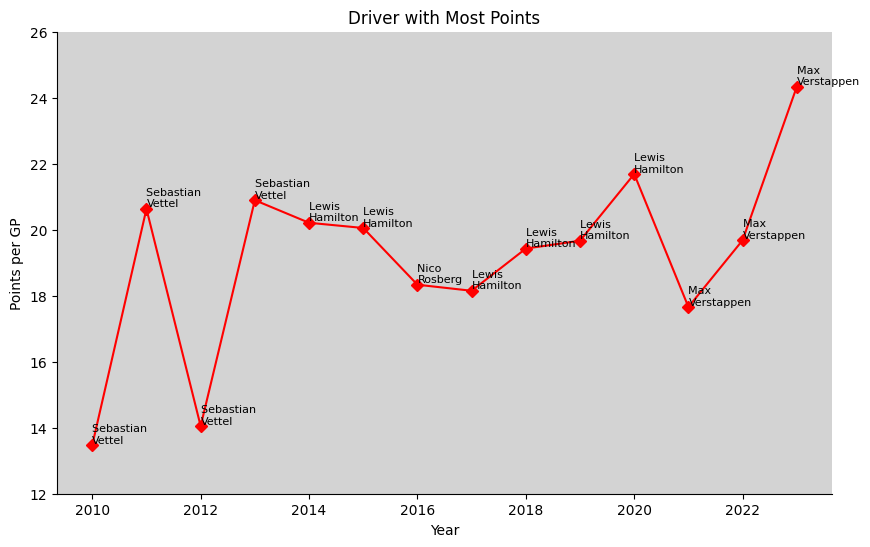

In [28]:

# First, make sure 'points' column is in numeric format
results_constructor_driver_merged['points'] = pd.to_numeric(results_constructor_driver_merged['points'], errors='coerce')

# Group by 'year', 'raceId', 'forename', and 'surname' to find the total points earned by each driver in each race
total_points_per_race = results_constructor_driver_merged.groupby(['year', 'raceId', 'forename', 'surname'])['points'].sum().reset_index()

# Group by 'year', 'forename', and 'surname' to find the average points earned by each driver per year
average_points_per_year = total_points_per_race.groupby(['year', 'forename', 'surname'])['points'].mean().reset_index()

# Find the driver with the highest average points in each year
driver_with_highest_avg_points = average_points_per_year.loc[average_points_per_year.groupby('year')['points'].idxmax()]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(driver_with_highest_avg_points['year'], driver_with_highest_avg_points['points'], marker='D', linestyle='-', color='#FF0000')
plt.title('Driver with Most Points')
plt.xlabel('Year')
plt.ylabel('Points per GP')

# Label the data points with the corresponding driver names
for i, row in driver_with_highest_avg_points.iterrows():
    plt.text(row['year'], row['points'], f"{row['forename']} \n{row['surname']}", ha='left', va='bottom', fontsize=8, color='black')

plt.ylim(12,26)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.show()

In [29]:
# Group by 'year', 'forename', and 'surname', and calculate the number of wins and total races for each person in each year
grouped_wins =results_constructor_driver_merged.groupby(['year', 'forename', 'surname']).agg({'positionOrder': lambda x: (x == 1).sum(), 'raceId': 'nunique'}).reset_index()

# Calculate the average win for each person in each year
grouped_wins['average_win'] = grouped_wins['positionOrder'] / grouped_wins['raceId']

# Display the resulting DataFrame
print(grouped_wins)

     year   forename  surname  positionOrder  raceId  average_win
0    2010     Adrian    Sutil              0      19     0.000000
1    2010      Bruno    Senna              0      18     0.000000
2    2010  Christian    Klien              0       3     0.000000
3    2010     Felipe    Massa              0      19     0.000000
4    2010   Fernando   Alonso              5      19     0.263158
..    ...        ...      ...            ...     ...          ...
320  2023      Oscar  Piastri              0      12     0.000000
321  2023     Pierre    Gasly              0      12     0.000000
322  2023     Sergio    Pérez              2      12     0.166667
323  2023   Valtteri   Bottas              0      12     0.000000
324  2023       Yuki  Tsunoda              0      12     0.000000

[325 rows x 6 columns]


In [30]:
# Find the row indices corresponding to the highest average_win for each year
idx_max_average_win = grouped_wins.groupby('year')['average_win'].idxmax()

# Select the rows with the highest average_win for each year
drivers_with_highest_average_win = grouped_wins.loc[idx_max_average_win]

# Display the resulting DataFrame
print(drivers_with_highest_average_win)

     year   forename     surname  positionOrder  raceId  average_win
4    2010   Fernando      Alonso              5      19     0.263158
49   2011  Sebastian      Vettel             11      19     0.578947
76   2012  Sebastian      Vettel              5      20     0.250000
100  2013  Sebastian      Vettel             13      19     0.684211
116  2014      Lewis    Hamilton             11      19     0.578947
137  2015      Lewis    Hamilton             10      19     0.526316
161  2016      Lewis    Hamilton             10      21     0.476190
186  2017      Lewis    Hamilton              9      20     0.450000
207  2018      Lewis    Hamilton             11      21     0.523810
229  2019      Lewis    Hamilton             11      21     0.523810
251  2020      Lewis    Hamilton             11      16     0.687500
272  2021        Max  Verstappen             10      22     0.454545
294  2022        Max  Verstappen             15      22     0.681818
317  2023        Max  Verstappen  

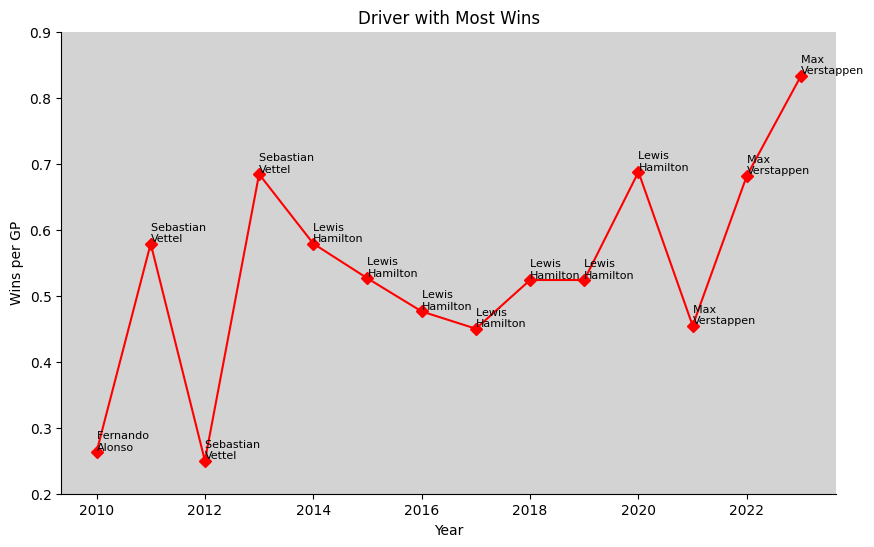

In [31]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(drivers_with_highest_average_win['year'], drivers_with_highest_average_win['average_win'], marker='D', linestyle='-', color='#FF0000')
plt.title('Driver with Most Wins')
plt.xlabel('Year')
plt.ylabel('Wins per GP')

# Label the data points with the corresponding driver names
for i, row in drivers_with_highest_average_win.iterrows():
    plt.text(row['year'], row['average_win'], f"{row['forename']} \n{row['surname']}", ha='left', va='bottom', fontsize=8, color='black')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.ylim(0.2,0.9)
plt.show()

## Social network analysis

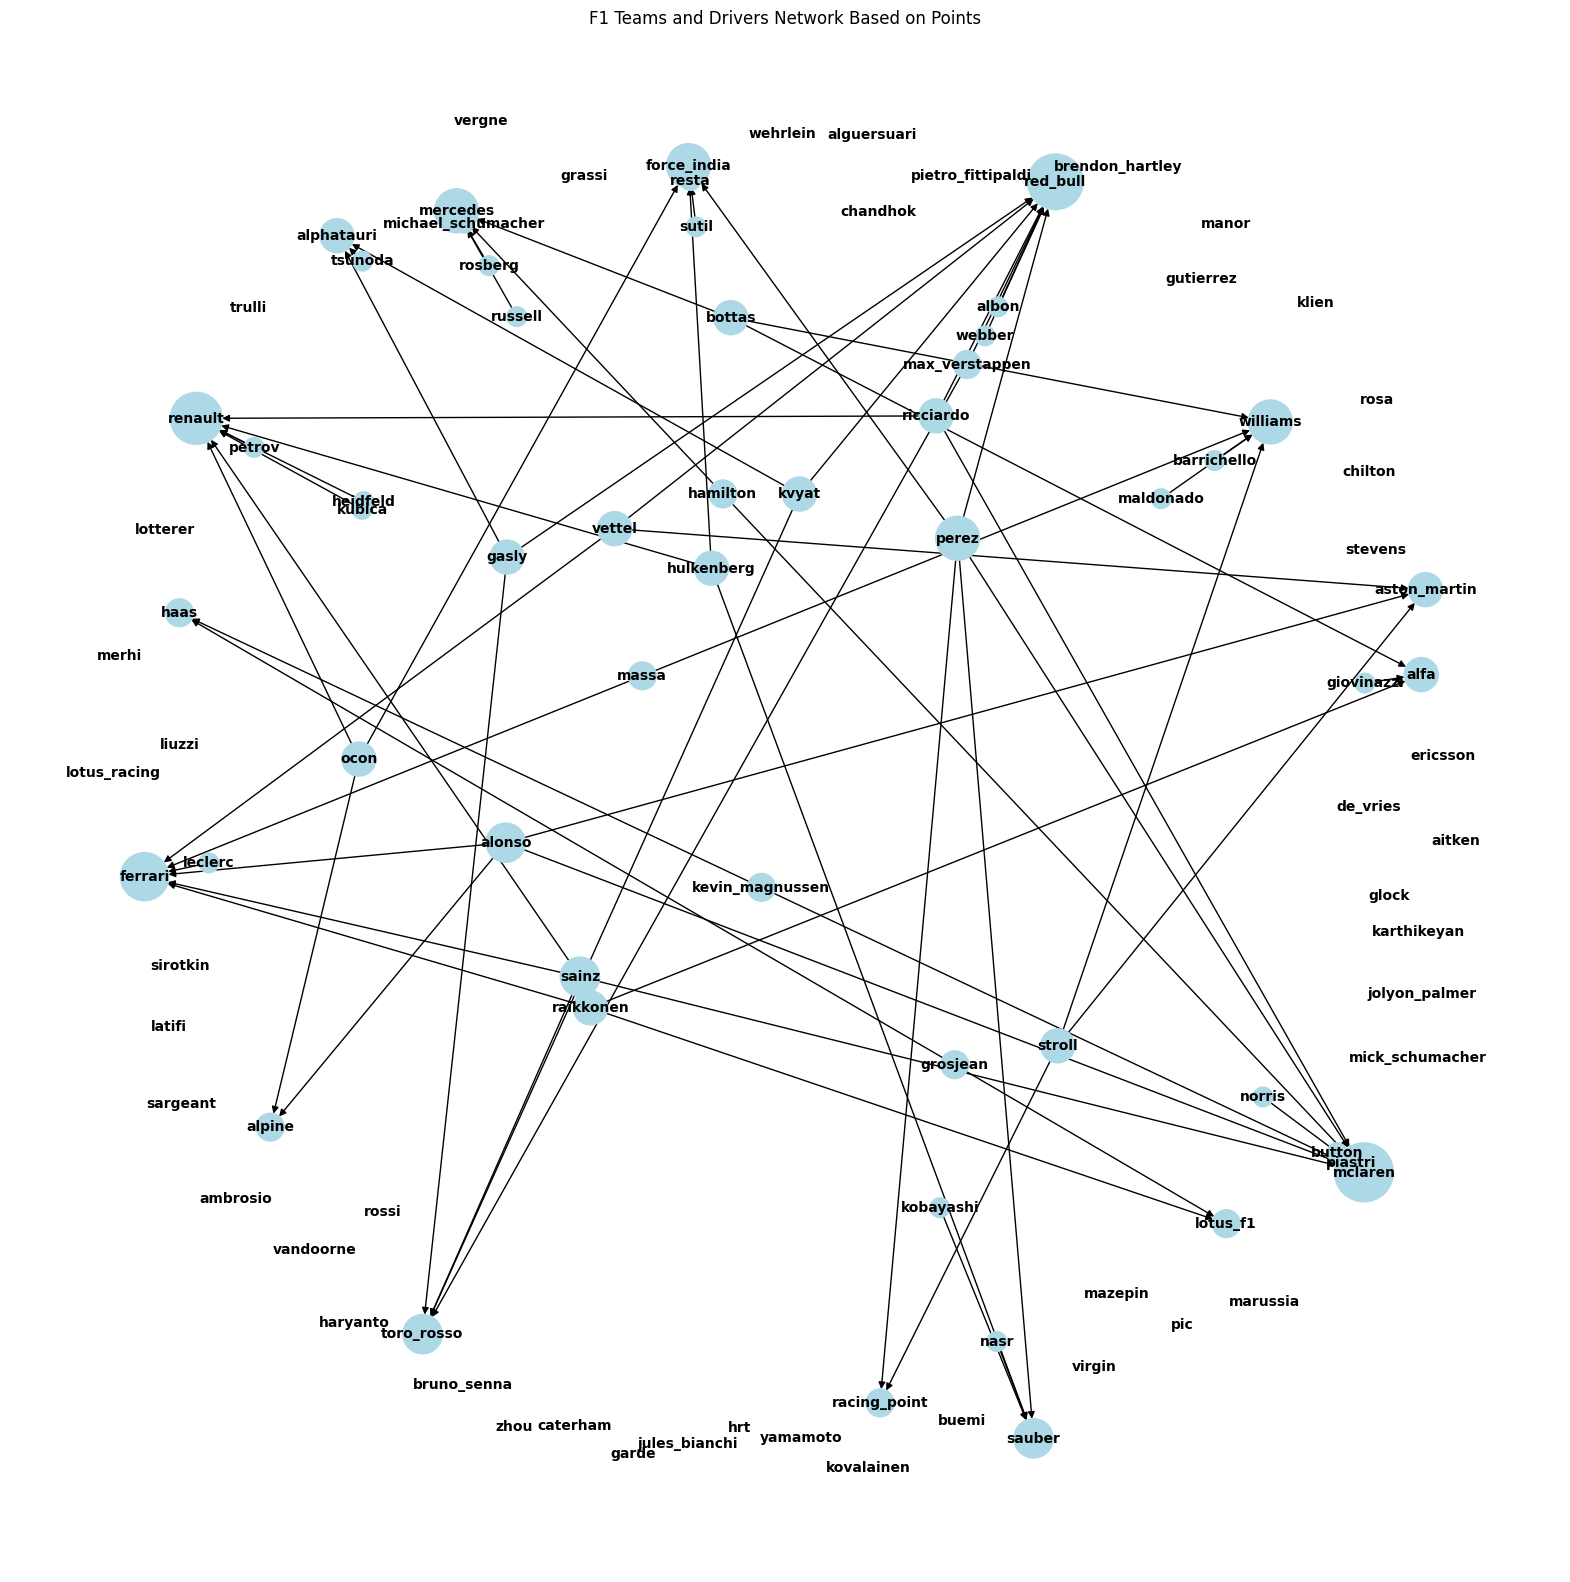

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Create empty directed graph
G = nx.DiGraph()

# Add driver nodes with attributes
for _, driver in results_constructor_driver_merged.iterrows():
    G.add_node(driver['driverRef'], node_type='driver', nationality=driver['nationality_x'])

# Add team nodes with attributes
for _, team in results_constructor_driver_merged.iterrows():
    G.add_node(team['constructorRef'], node_type='team', nationality=team['nationality_y'])

# Adjusting edge addition to include dynamic weights based on points
for _, race in results_constructor_driver_merged.iterrows():
    driver = race['driverRef']
    team = race['constructorRef']
    points = race['points']  # Points scored in this race
    
    # Determine if this race's points qualify for edge weight adjustment
    if points >= 10:
        if G.has_edge(driver, team):
            # Update the weight based on additional points
            G[driver][team]['weight'] += points
        else:
            # Add new edge with initial weight based on the points
            G.add_edge(driver, team, weight=points, race_ids=[race['raceId']])

# Now, G contains edges weighted by the points scored in qualifying races

# Visualize the network
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=42)  # Using a fixed seed for reproducibility
# Adjusting node sizes for better visualization
node_sizes = [G.degree(node) * 200 for node in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('F1 Teams and Drivers Network Based on Points')
plt.axis('off')  # Turn off the axis for better aesthetics
plt.show()

In [33]:
# Remove 'race_ids' attributes before saving
for u, v, data in G.edges(data=True):
    if 'race_ids' in data:
        del data['race_ids']  # Remove the 'race_ids' attribute

# Save the graph to a GraphML file
nx.write_graphml(G, "2weight_top5win_network_graph.graphml")

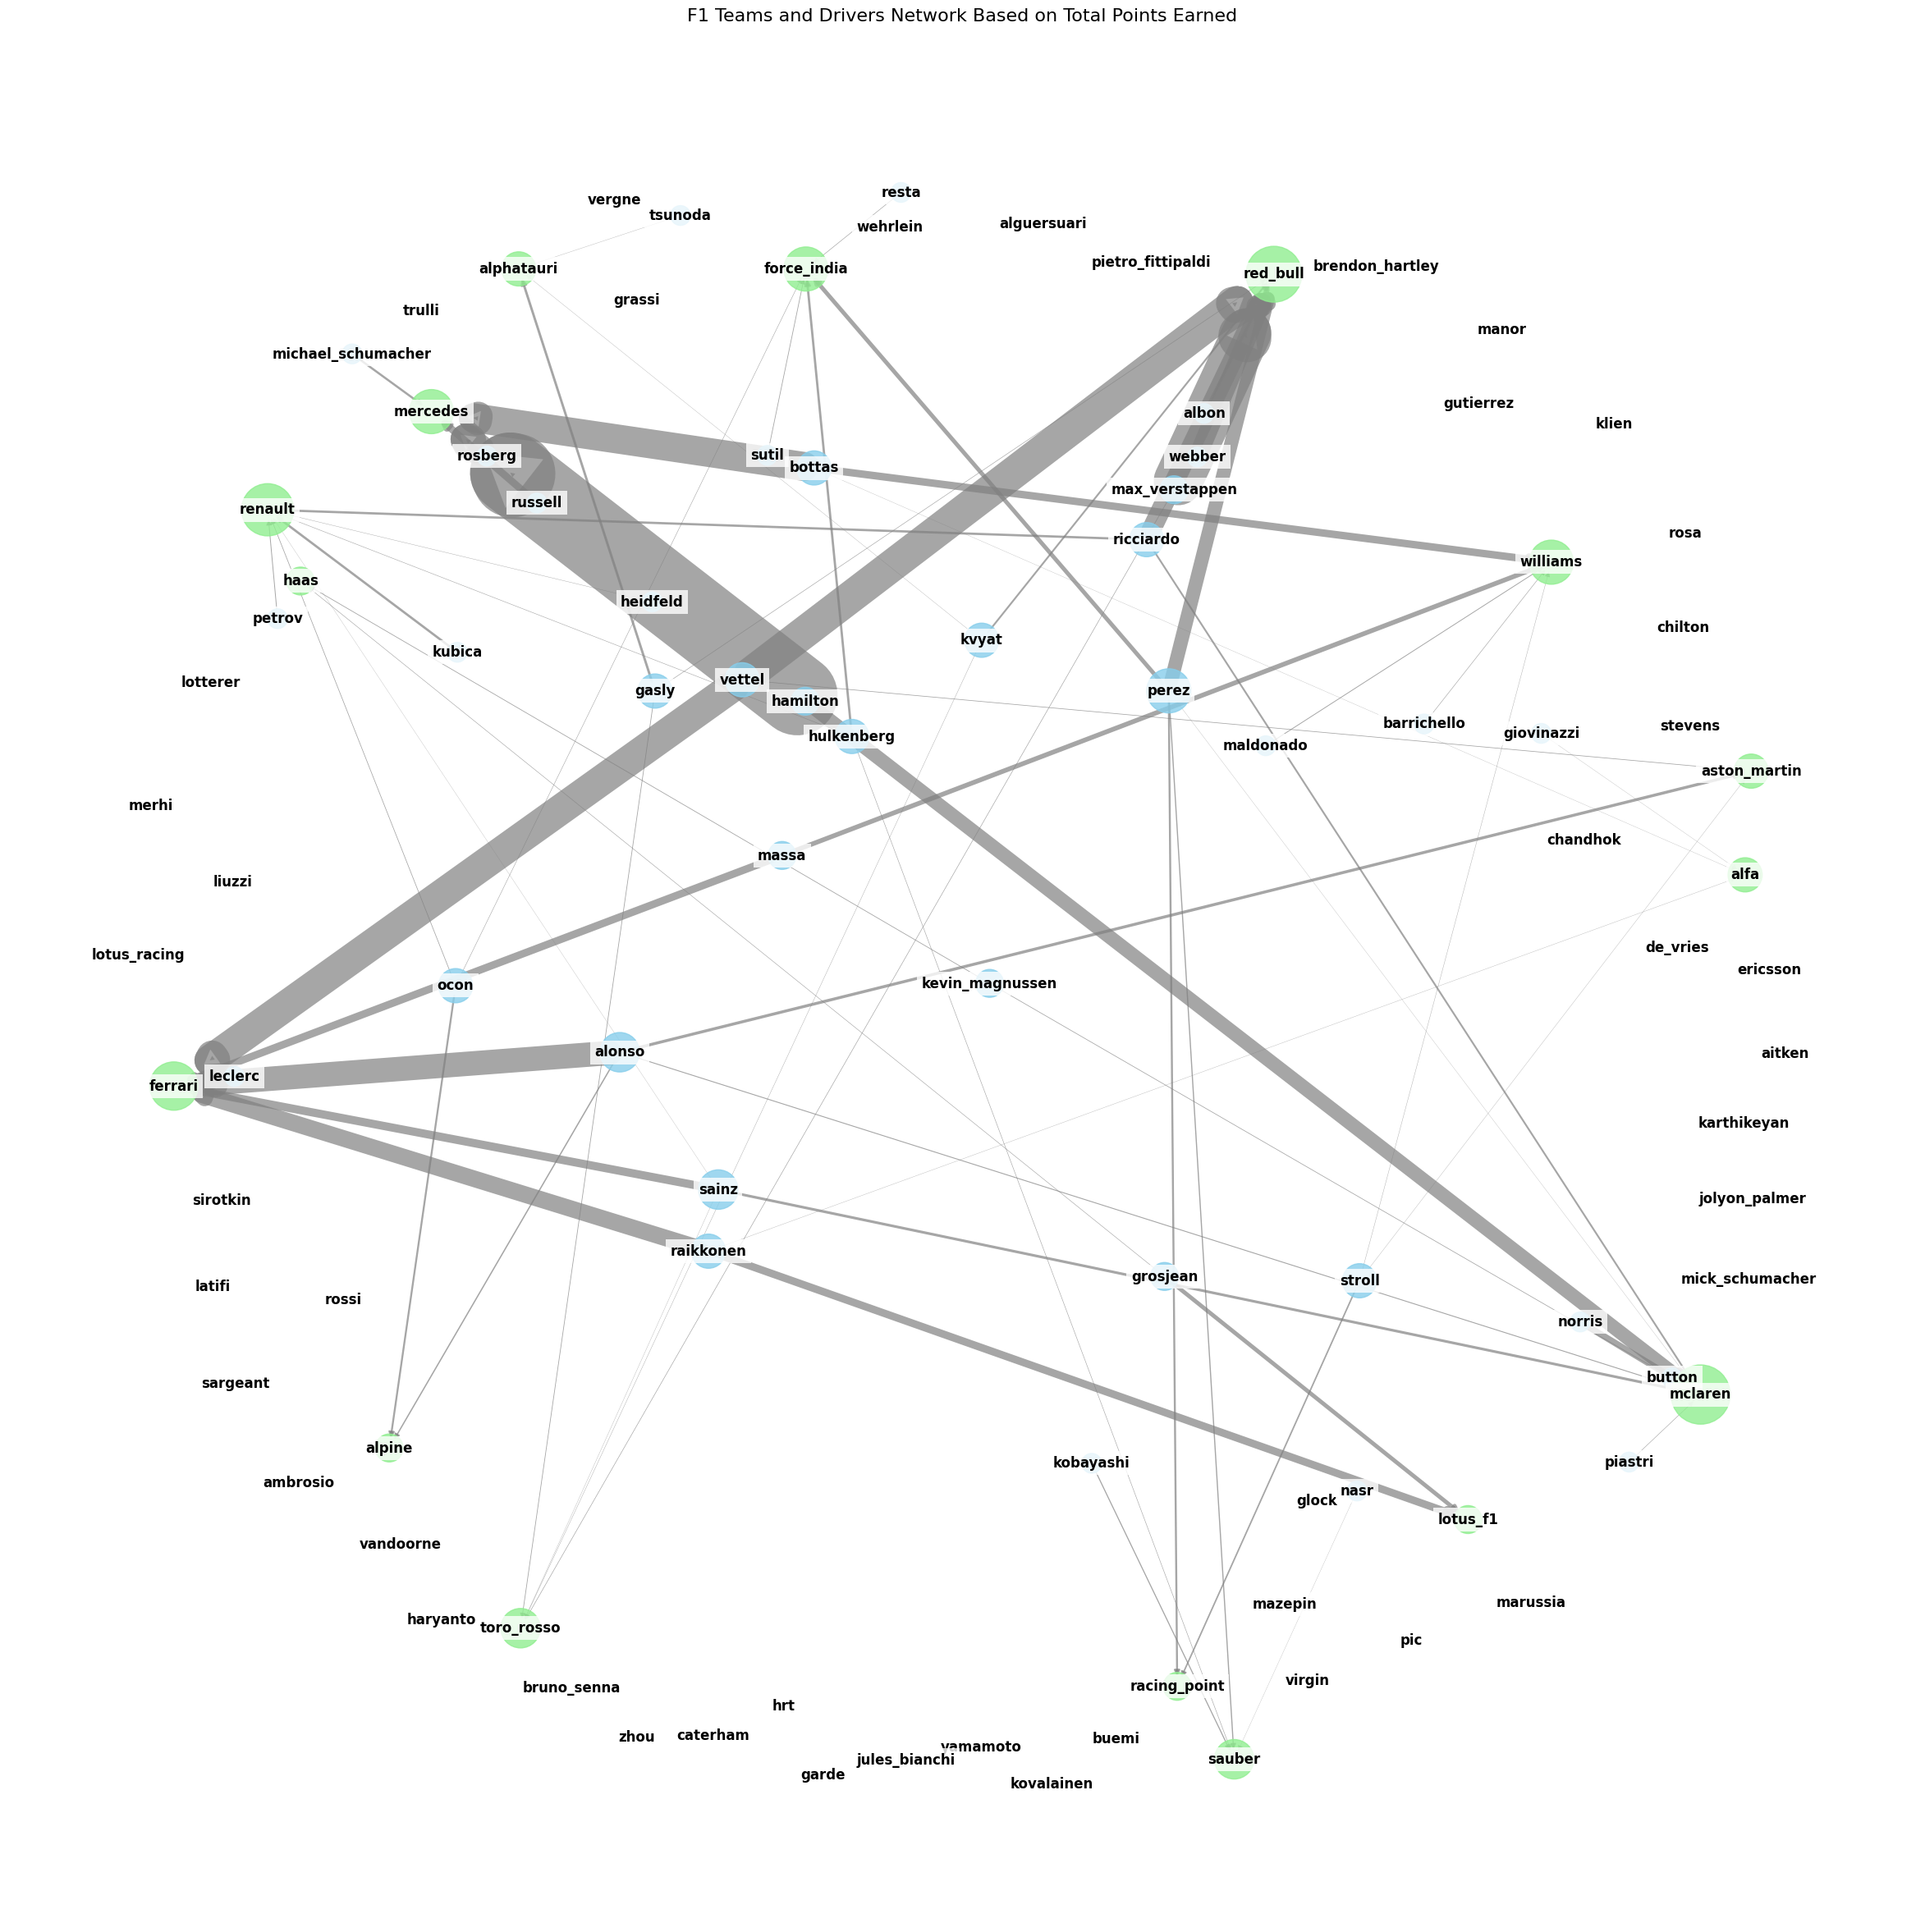

In [34]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming G has already been constructed with nodes and edges, and edge weights represent the total points

# Calculate the degree of each node for node size adjustment
degrees = dict(G.degree())

# Adjust node sizes more dramatically based on degrees
node_sizes = [degrees[node] * 300 for node in G.nodes()]  # Adjust this formula as needed for visibility

# Define node colors by type: 'skyblue' for drivers, 'lightgreen' for teams
node_colors = ['skyblue' if G.nodes[node]['node_type'] == 'driver' else 'lightgreen' for node in G.nodes()]

# Create a layout for our nodes using the spring layout
pos = nx.spring_layout(G, k=0.75, iterations=50, seed=42)  # Adjust layout spacing and seed for reproducibility

# Calculate edge widths based on points earned (weights)
edge_widths = [G[u][v]['weight'] / 50 for u, v in G.edges()]  # Divide by 10 to scale edge width for visibility

# Draw the graph with adjusted node sizes and edge widths
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_widths, alpha=0.7)
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Customize the plot with a title and by turning off the axis
plt.title('F1 Teams and Drivers Network Based on Total Points Earned', fontsize=16)
plt.axis('off')  # Turn off the axis for better aesthetics

# Show the plot
plt.show()

In [35]:
# Basic network analysis
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")


sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Print the sorted degree centrality values
print("Degree Centrality in descending order:")
for node, centrality in sorted_degree_centrality:
    print(f"{node}: {centrality}")


# Identify driver with highest degree centrality (most connections)
max_degree_driver = max(degree_centrality, key=degree_centrality.get)
print("\nDriver with highest degree centrality:", max_degree_driver)

Number of nodes: 98
Number of edges: 70
Nodes: ['alonso', 'massa', 'hamilton', 'vettel', 'rosberg', 'michael_schumacher', 'button', 'webber', 'liuzzi', 'barrichello', 'kubica', 'sutil', 'alguersuari', 'hulkenberg', 'kovalainen', 'buemi', 'trulli', 'rosa', 'bruno_senna', 'glock', 'petrov', 'kobayashi', 'grassi', 'chandhok', 'yamamoto', 'heidfeld', 'klien', 'resta', 'ambrosio', 'maldonado', 'perez', 'karthikeyan', 'ricciardo', 'raikkonen', 'vergne', 'pic', 'grosjean', 'gutierrez', 'bottas', 'jules_bianchi', 'chilton', 'garde', 'kevin_magnussen', 'kvyat', 'ericsson', 'lotterer', 'stevens', 'nasr', 'sainz', 'max_verstappen', 'merhi', 'rossi', 'jolyon_palmer', 'wehrlein', 'haryanto', 'vandoorne', 'ocon', 'giovinazzi', 'stroll', 'gasly', 'brendon_hartley', 'leclerc', 'sirotkin', 'norris', 'albon', 'russell', 'latifi', 'aitken', 'pietro_fittipaldi', 'tsunoda', 'mick_schumacher', 'mazepin', 'zhou', 'de_vries', 'sargeant', 'piastri', 'ferrari', 'mclaren', 'red_bull', 'mercedes', 'force_india', 

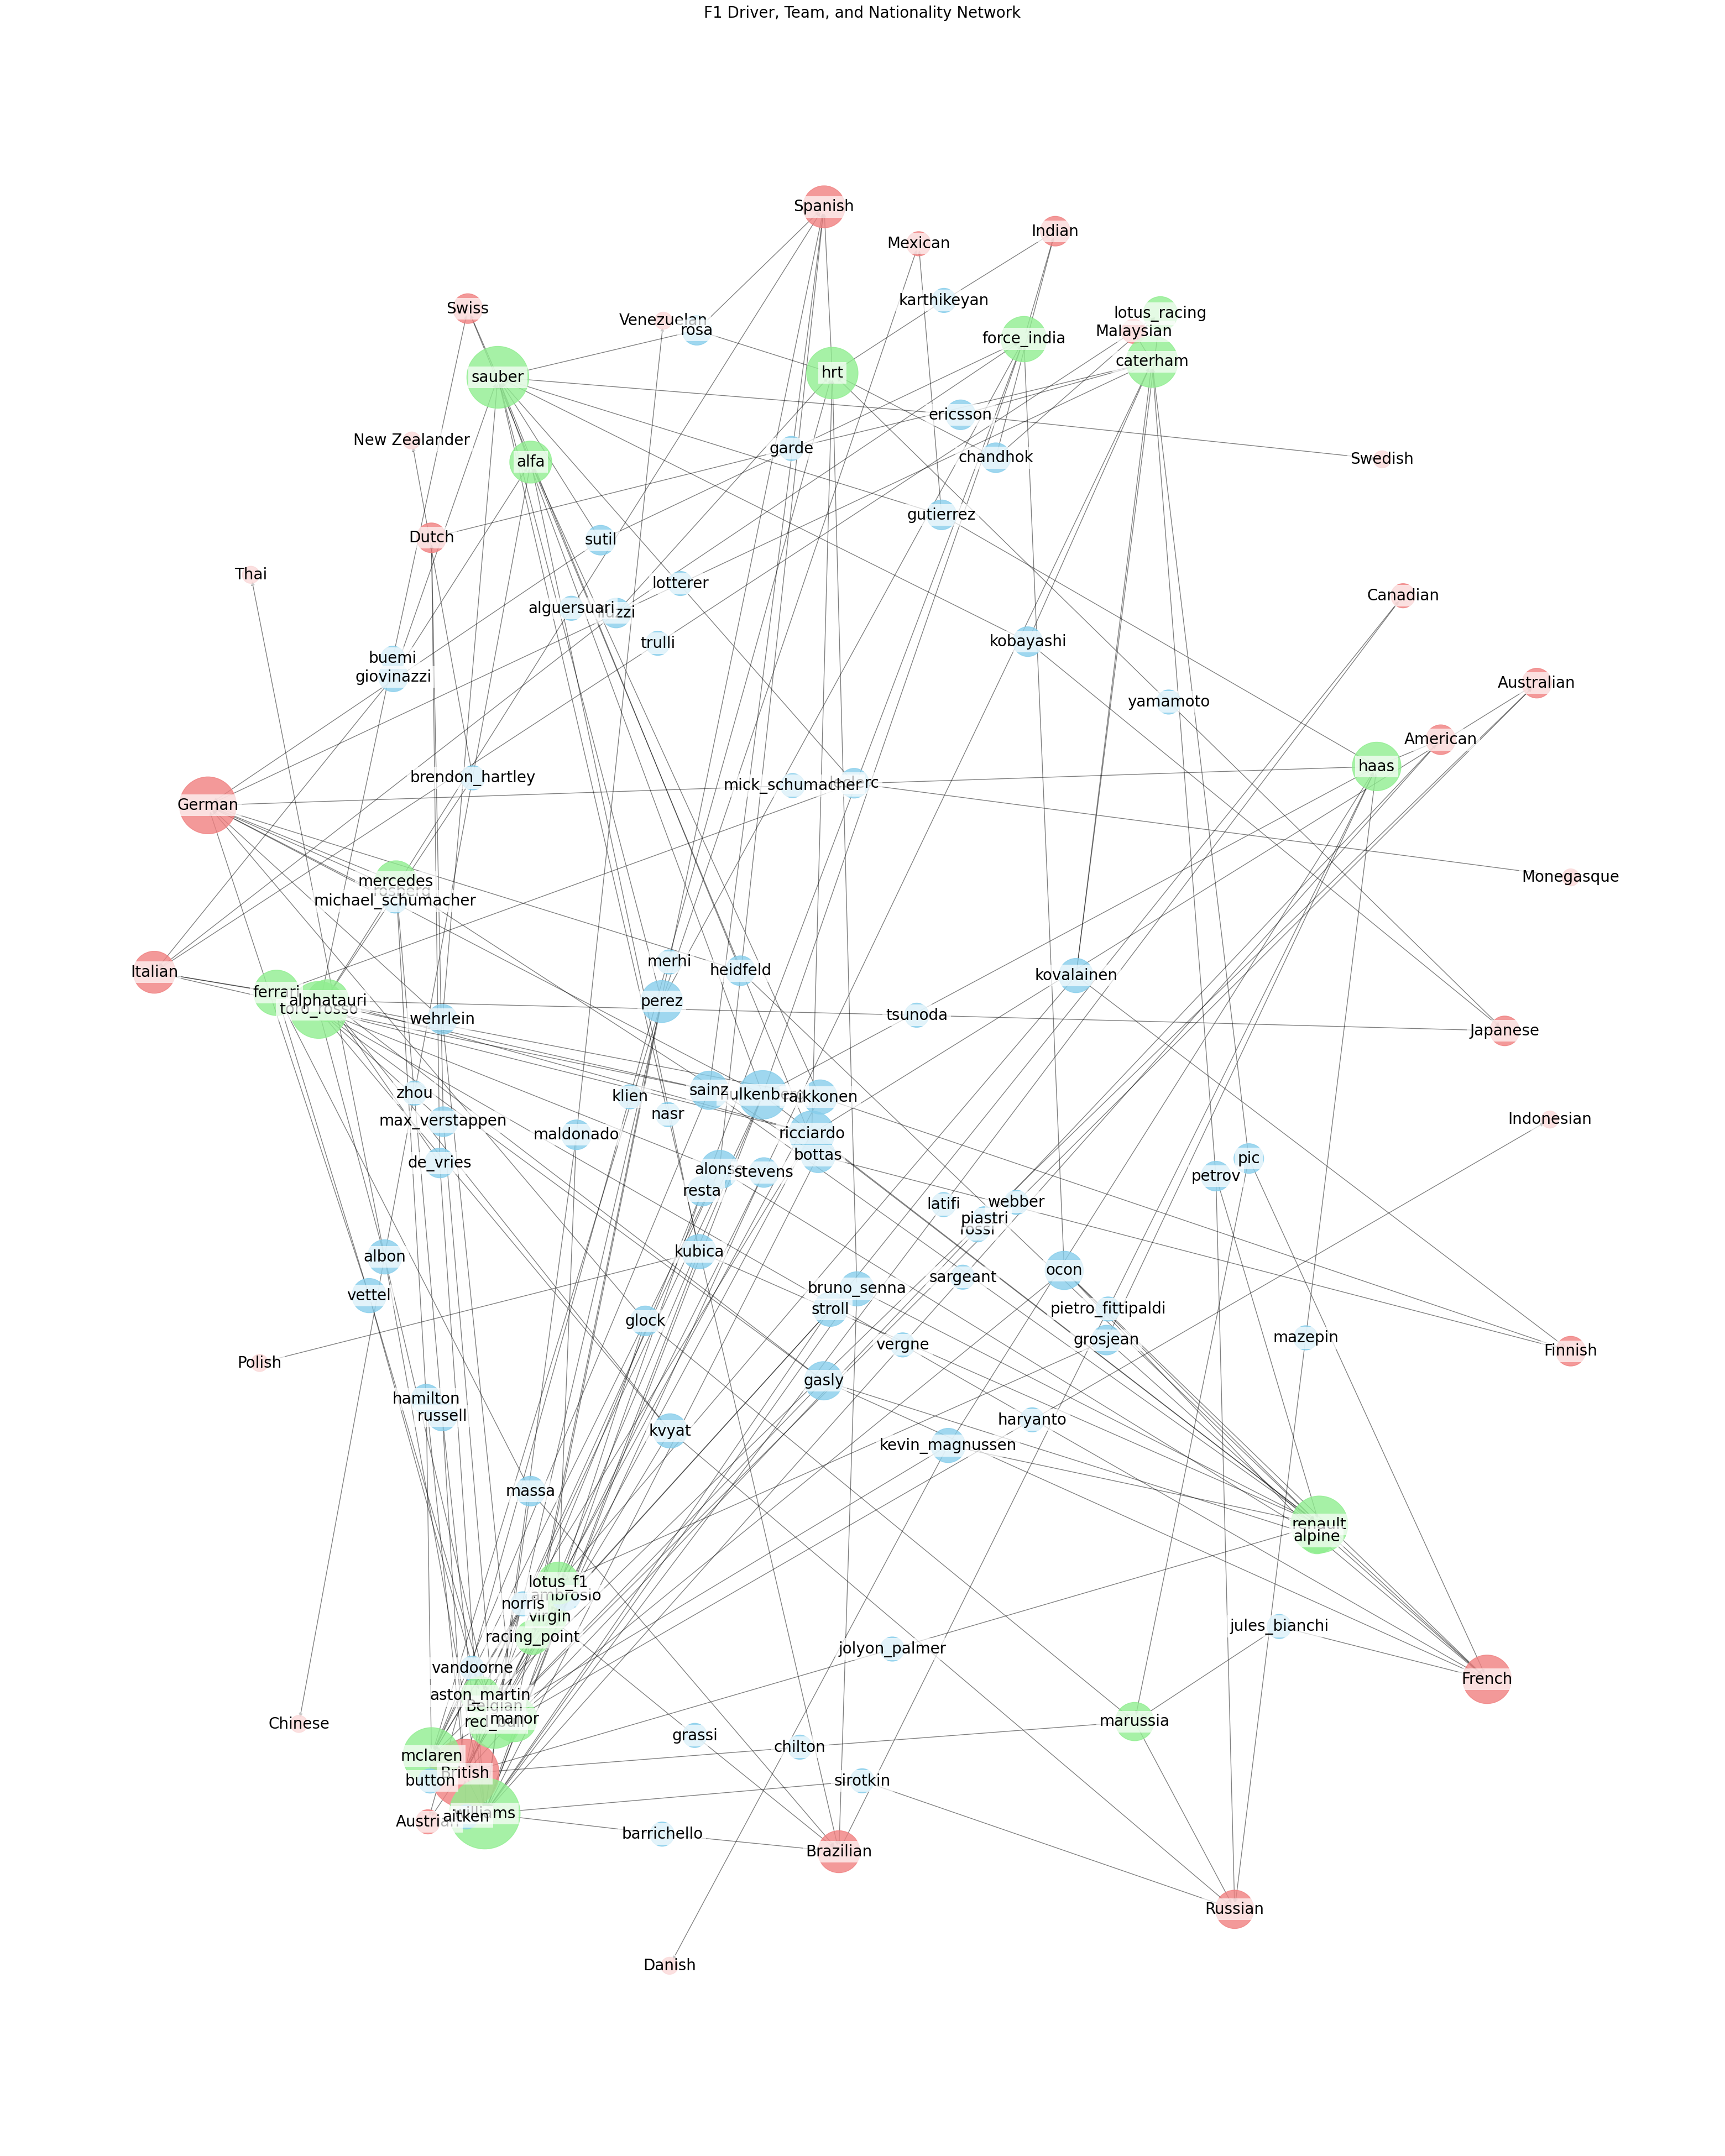

In [36]:
#ignore this part, we can just analyze the nationality based on the previous network 

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming results_constructor_driver_merged is your DataFrame

# Initialize a directed graph
G = nx.DiGraph()

# Step 1: Create nodes for all unique nationalities
nationalities = set(results_constructor_driver_merged['nationality_x']).union(set(results_constructor_driver_merged['nationality_y']))
for nat in nationalities:
    G.add_node(nat, type='nationality', color='lightcoral')

# Step 2: Add nodes and edges for drivers and teams
for _, row in results_constructor_driver_merged.iterrows():
    # Add driver node if it doesn't already exist
    if row['driverRef'] not in G:
        G.add_node(row['driverRef'], type='driver', color='skyblue')
    # Add team node if it doesn't already exist
    if row['constructorRef'] not in G:
        G.add_node(row['constructorRef'], type='team', color='lightgreen')
    
    # Add edges
    G.add_edge(row['driverRef'], row['constructorRef'])
    G.add_edge(row['driverRef'], row['nationality_x'])
    G.add_edge(row['constructorRef'], row['nationality_y'])

# Generate positions for nodes using a layout that spreads nodes
pos = nx.spring_layout(G,seed=0)

# Calculate the degree for each node and create a size list
degrees = dict(G.degree())
node_sizes = [degrees[node] * 500 for node in G.nodes()]  # Adjust scale as needed

#To save your graph G to a GraphML file
nx.write_graphml(G, "Driver,team,nationality_network_graph2.graphml")

# Draw the network
plt.figure(figsize=(40, 50))  # Increase figure size
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=[G.nodes[n]['color'] for n in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=20, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Set plot title and remove axes
plt.title('F1 Driver, Team, and Nationality Network', fontsize=20)
plt.axis('off')

# Show the plot
plt.show()


/var/folders/k9/gpzfcm4x0jz9pks54lj73gd00000gn/T/ipykernel_65258/1823217907.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  qualifying_results_merged[col] = qualifying_results_merged[col].fillna(method='ffill')


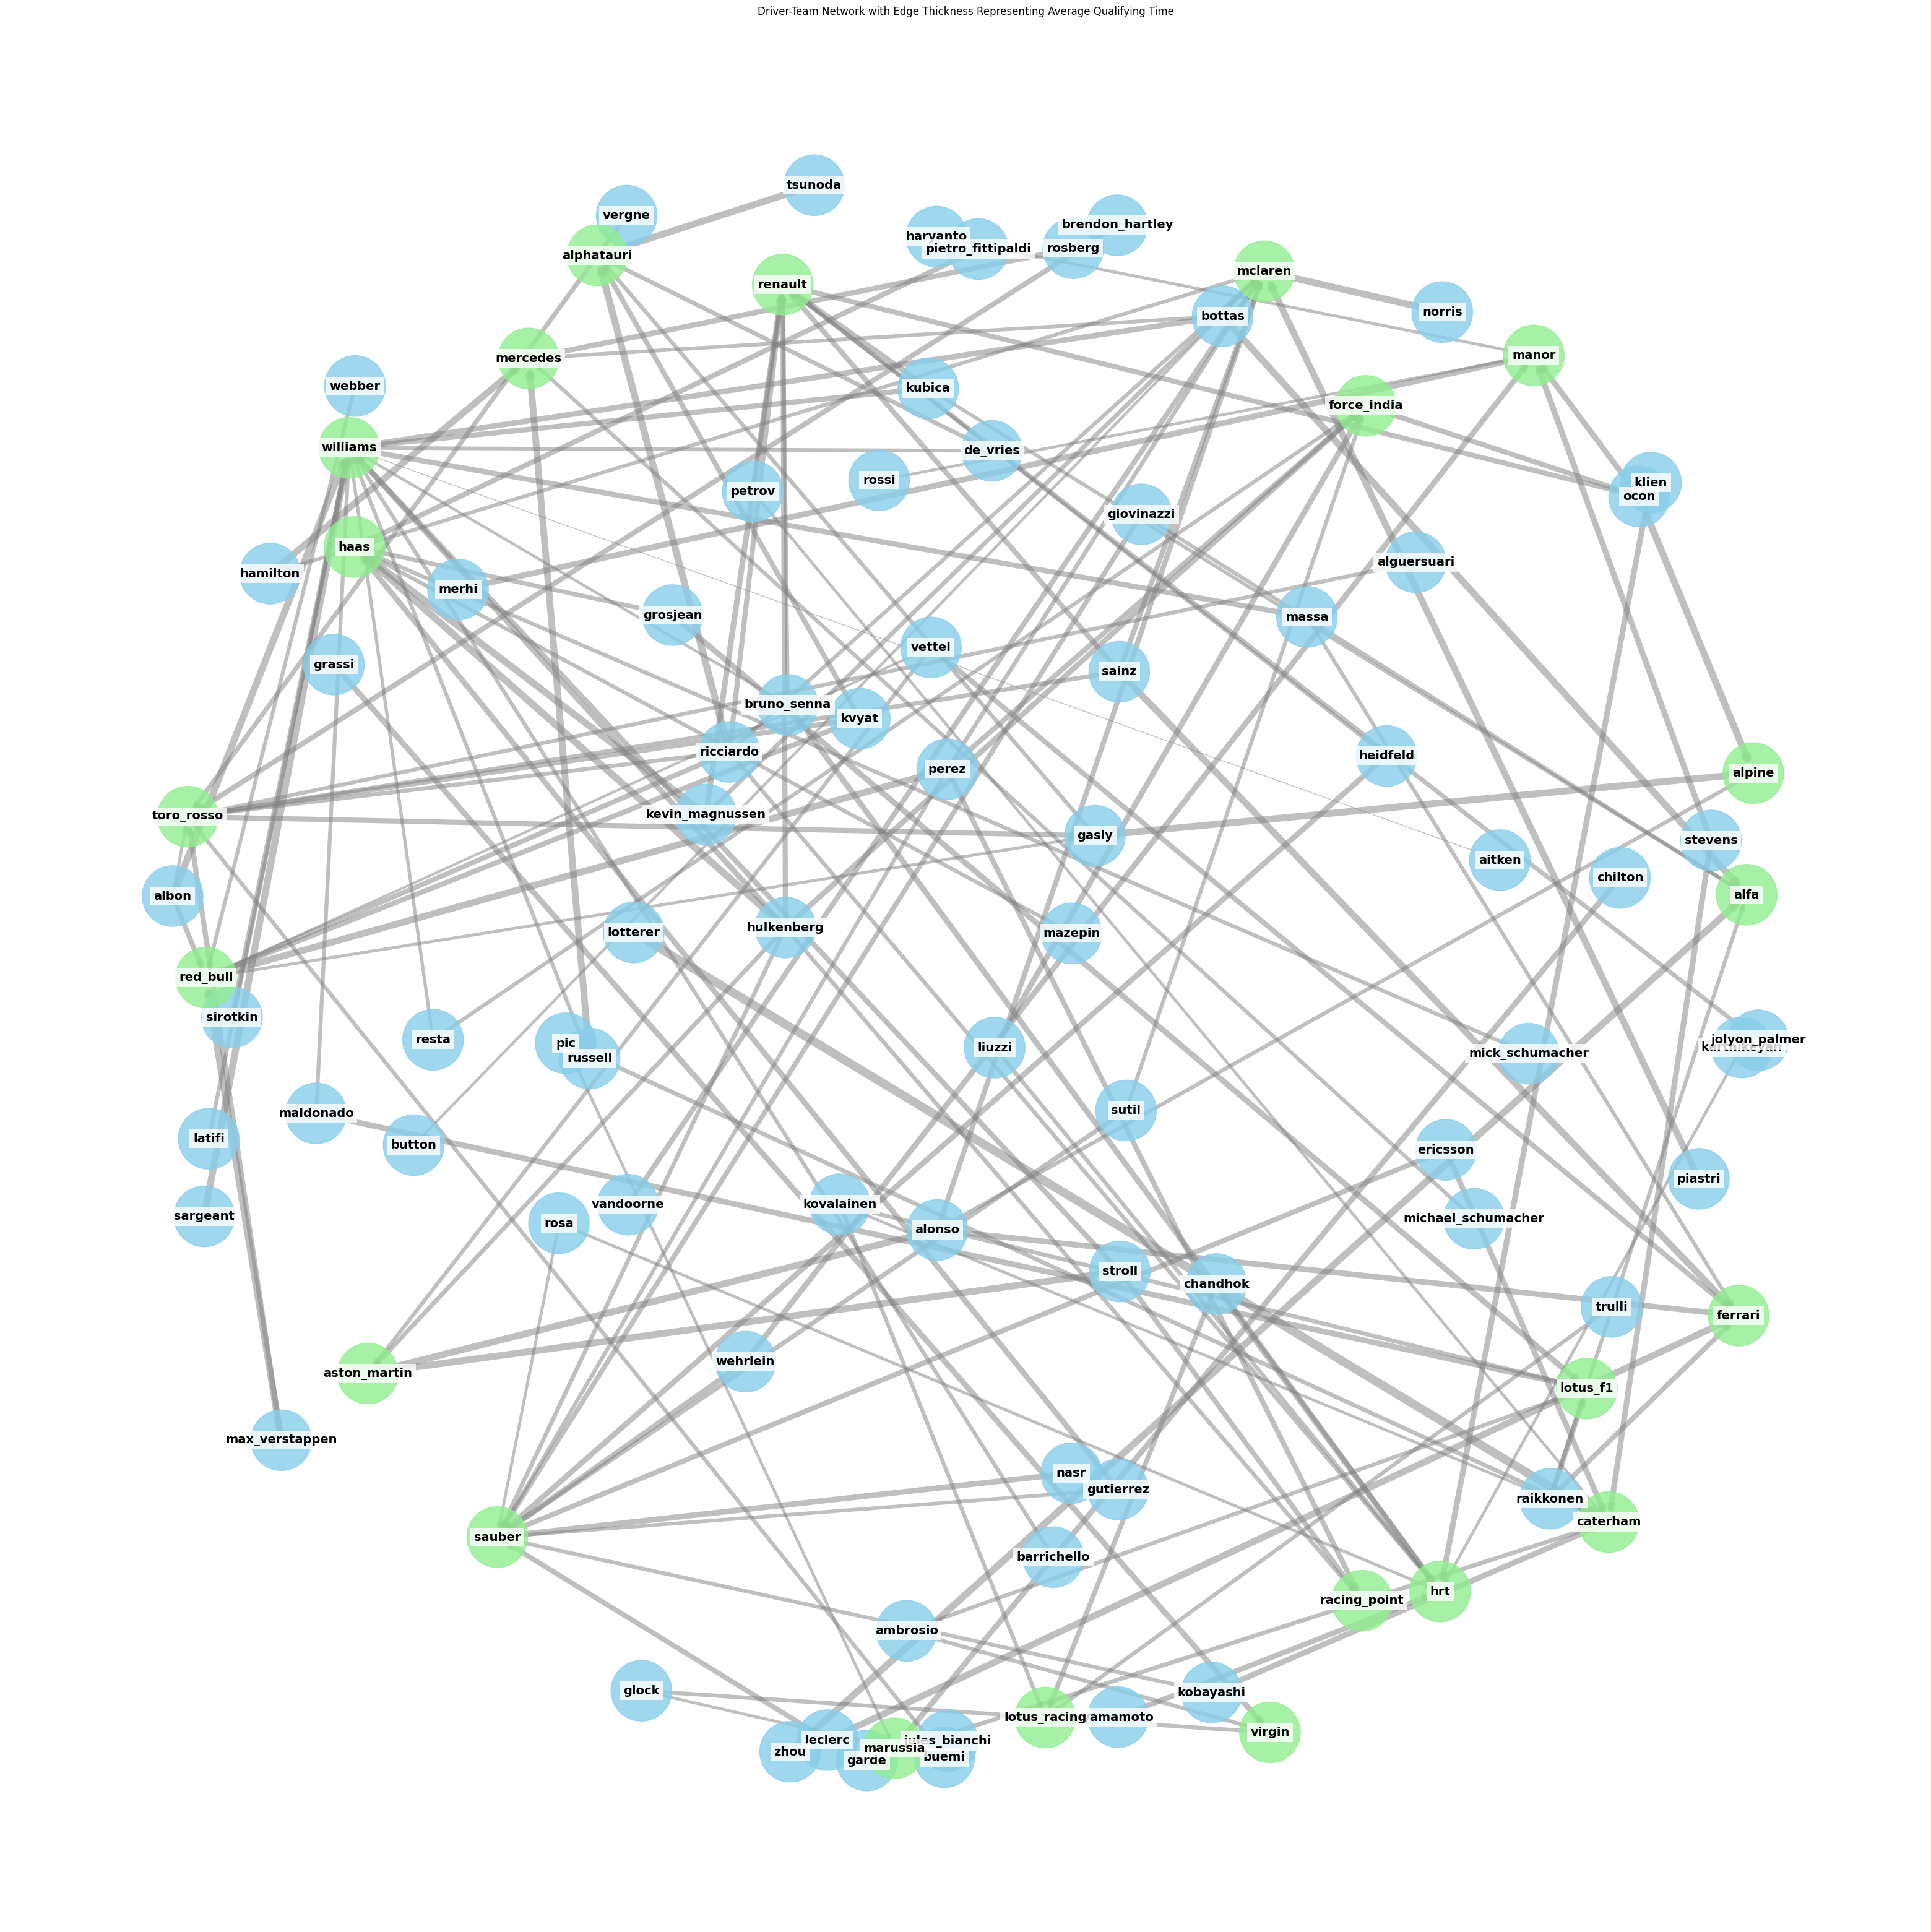

In [37]:

# Merge driver data with results data based on driver ID
results_driver_merged = pd.merge(results_data, driver_data, how='left', left_on='driverId', right_on='driverId')
# Merge race data with merged driver-results data based on race ID
results_driver_merged = pd.merge(results_driver_merged, race_data, how='left', left_on='raceId', right_on='raceId')
# Merge race data with merged driver-results data based on race ID
results_driver_merged_constructor = pd.merge(results_driver_merged, constructor_data, how='left', left_on='constructorId', right_on='constructorId')
# Merge qualifying data with merged results-driver data based on driver ID and race ID
qualifying_results_merged = pd.merge(qualifying_data, results_driver_merged_constructor, how='inner', on=['driverId', 'raceId'])

# Filter the data to include only the last 13 years
qualifying_results_merged = qualifying_results_merged[(qualifying_results_merged['year'] >=2010) &(qualifying_results_merged['year']<=2023)]



import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Function to convert qualifying time to milliseconds
def time_to_milliseconds(time_str):
    parts = time_str.split(':')
    mins = int(parts[0])
    secs, millisecs = map(int, parts[1].split('.'))
    return mins * 60 * 1000 + secs * 1000 + millisecs


# Convert qualifying times to milliseconds
qualifying_columns = ['q1', 'q2', 'q3']
for col in qualifying_columns:
    qualifying_results_merged[col] = qualifying_results_merged[col].replace('\\N', np.nan)
    qualifying_results_merged[col] = qualifying_results_merged[col].fillna(method='ffill')
    qualifying_results_merged[col] = qualifying_results_merged[col].apply(time_to_milliseconds)

# Create empty directed graph
G = nx.DiGraph()

# Add driver nodes with attributes
for _, driver in qualifying_results_merged.iterrows():
    G.add_node(driver['driverRef'], node_type='driver', nationality=driver['nationality_x'])

# Add team nodes with attributes
for _, team in qualifying_results_merged.iterrows():
    G.add_node(team['constructorRef'], node_type='team', nationality=team['nationality_y'])

# Add edges for average qualifying time between drivers and teams
for _, row in qualifying_results_merged.iterrows():
    driver = row['driverRef']
    team = row['constructorRef']
    qualifying_times = [row[col] for col in qualifying_columns if not pd.isnull(row[col])]
    if qualifying_times:
        average_qualifying_time = sum(qualifying_times) /len(qualifying_times)
        G.add_edge(driver, team, avg_qualifying_time=average_qualifying_time)

# Get edge data and handle case where there are no qualifying times
edge_data = [data['avg_qualifying_time'] for _, _, data in G.edges(data=True) if 'avg_qualifying_time' in data]
if edge_data:
    # Define edge thicknesses based on average qualifying time
    max_qualifying_time = max(edge_data)
    min_qualifying_time = min(edge_data)
    edge_thicknesses = [1 + 9 * (data - min_qualifying_time) / (max_qualifying_time - min_qualifying_time) for data in edge_data]
    #(data - min_qualifying_time) / (max_qualifying_time - min_qualifying_time)
else:
    max_qualifying_time = max(edge_data)
    min_qualifying_time = min(edge_data)
    edge_thicknesses = [1 + 9 * (data - min_qualifying_time) / (max_qualifying_time - min_qualifying_time) for data in edge_data]

# Define node colors by type: 'skyblue' for drivers, 'lightgreen' for teams
node_colors = ['skyblue' if G.nodes[node]['node_type'] == 'driver' else 'lightgreen' for node in G.nodes()]

# Create a layout for our nodes using the spring layout
pos = nx.spring_layout(G, k=0.9, iterations=50, seed=42)  # Adjusted for a more spread out layout


# Draw the graph
plt.figure(figsize=(40, 40))  # Increase figure size for better visibility
nx.draw_networkx_nodes(G, pos, node_color=node_colors, alpha=0.8,node_size=5000)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_thicknesses, alpha=0.5)

# Draw labels with increased font size and a white background for clarity
labels = nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

plt.title('Driver-Team Network with Edge Thickness Representing Average Qualifying Time')
plt.axis('off')  # Turn off the axis for better aesthetics
plt.show()
# Add node labels as attributes to the graph
labels = {node: node for node in G.nodes()}
nx.set_node_attributes(G, labels, 'label')
# Add edge thickness attribute to the graph
nx.set_edge_attributes(G, {edge: {'edge_thickness': thickness} for edge, thickness in zip(G.edges(), edge_thicknesses)})
# To save your graph G to a GraphML file for further analysis or visualization in other tools
nx.write_graphml(G, "network_graph.graphml")

In [39]:
# 导入所需的模块
from nbconvert import PythonExporter
import nbformat

# 将Jupyter笔记本转换为Python脚本的函数
def convert_ipynb_to_py(ipynb_file):
    # 读取.ipynb文件
    with open(ipynb_file, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)

    # 创建PythonExporter实例
    exporter = PythonExporter()

    # 将.ipynb文件转换为.py格式
    (python_code, _) = exporter.from_notebook_node(nb)

    # 创建输出的.py文件
    py_file = ipynb_file.replace('.ipynb', '.py')
    with open(py_file, 'w', encoding='utf-8') as f:
        f.write(python_code)

    print(f"成功将.ipynb文件转换为.py文件: {py_file}")

# 使用.ipynb文件转换为.py文件
convert_ipynb_to_py('/Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/CSA Project4.ipynb')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


成功将.ipynb文件转换为.py文件: /Users/angelsheu/Desktop/UCI/Q3/Customer& Social/project/CSA Project4.py
